# Easi, EG36, CLR normalized proteins

Sample description:
- Diagnosis: Aplastic anemia
- BM blasts: 0%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')

Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#raw protein data, all datasets

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')


In [3]:
adata.obs['batch_group'] 

AAACCTGAGCCCTAAT-1-100    Easi
AAACCTGCAAGCCGCT-1-100    Easi
AAACCTGCACTGTCGG-1-100    Easi
AAACCTGCAGACGCTC-1-100    Easi
AAACCTGTCCTTAATC-1-100    Easi
                          ... 
TTTGTCAGTACATCCA-1-158    Easi
TTTGTCAGTAGGCATG-1-158    Easi
TTTGTCAGTATGCTTG-1-158    Easi
TTTGTCATCAAACCAC-1-158    Easi
TTTGTCATCCATGAAC-1-158    Easi
Name: batch_group, Length: 121340, dtype: category
Categories (1, object): ['Easi']

In [4]:
adata_easi=adata[adata.obs['batch_group'] == 'Easi' ]

adata_easi

View of AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [5]:
adata_easi.obs['POOL'].unique().tolist()

['EG35',
 'EG38',
 'EG58',
 'EG39',
 'EG4',
 'EG48',
 'EG23',
 'EG36',
 'EG61',
 'EG3',
 'EG12',
 'EG46',
 'EG9',
 'EG43',
 'EG56',
 'EG42',
 'EG49',
 'EG37',
 'EG57',
 'EG24',
 'EG11',
 'EG14',
 'EG55',
 'EG28',
 'EG52',
 'EG33',
 'EG10',
 'EG32',
 'EG59',
 'EG16',
 'EG63',
 'EG15',
 'EG21',
 'EG26',
 'EG13',
 'EG53',
 'EG51',
 'EG2',
 'EG40',
 'EG62',
 'EG31',
 'EG7',
 'EG8',
 'EG29',
 'EG41',
 'EG47',
 'EG1',
 'EG6',
 'EG34',
 'EG30',
 'EG60',
 'EG44',
 'EG27',
 'EG22',
 'EG54',
 'EG45',
 'EG5',
 'EG50',
 'EG25']

In [6]:
adata_easi.obs['new_cell_type'].unique().tolist()

['NK',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [7]:
#select sample from Easigenomics dataset

adata_sample=adata_easi[adata_easi.obs['POOL'] == 'EG36']

In [8]:
adata_sample.copy()

AnnData object with n_obs × n_vars = 2169 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [9]:
adata_sample.obs['new_cell_type'].unique().tolist()

['NK', 'non-leukemic']

In [10]:
adata_sample.obs['POOL'].unique().tolist()

['EG36']

In [11]:
#Select only NK-cells (based on new_cell_type annotations)

adata_nk=adata_sample[adata_sample.obs['new_cell_type'] == 'NK' ]

In [12]:
adata_nk.copy()

AnnData object with n_obs × n_vars = 1585 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [13]:
#Two types of NK cells annotated by Seurat

adata_nk.obs['cell_type']

AAACCTGAGCTGAACG-1-107    NKT
AAACCTGAGGTGGGTT-1-107    NKT
AAACCTGGTATATCCG-1-107    NKT
AAACCTGGTCACACGC-1-107    NKT
AAACCTGGTCCAGTGC-1-107    NKT
                         ... 
TTTGGTTTCACGCGGT-1-107    NKT
TTTGGTTTCTGTCAAG-1-107    NKT
TTTGTCAAGTCGTTTG-1-107    NKT
TTTGTCATCAGTACGT-1-107    NKT
TTTGTCATCGCCTGAG-1-107    NKT
Name: cell_type, Length: 1585, dtype: category
Categories (1, object): ['NKT']

In [14]:
#surface protein expression of NK- and T-cells
nk_prot=adata_nk.obsm['protein_expression_clr']

In [15]:
#surface protein expression of whole sample
prot=adata_sample.obsm['protein_expression_clr']

In [16]:
#NK- and T-cells in sample
nk_prot.shape

(1585, 33)

In [17]:
#All cells in sample

prot.shape

(2169, 33)

In [18]:
#To exclude columns that contain only zeros, all cell types included

prot = pd.DataFrame(prot)
prot != 0
(prot != 0).any(axis=0)
prot.loc[:, (prot != 0).any(axis=0)]
prot = prot.loc[:, (prot != 0).any(axis=0)]

for col in prot:
    print(col)

CD19
CD10
CD20
CD3
CD2
CD11b
HLADR
CD38
CD11c
CD7
CD45
CD33
CD81
CD73
CD123
CD14
CD45RA
CD45RO
CD4
CD8a
CD197
CD127
CD56
CD5
CD15
CD64
CD117
CD24
CD44
CD58
CD66ace
CD13
CD34


In [19]:
#To exclude columns that contain only zeros from NKT-only file

nk_prot = pd.DataFrame(nk_prot)
nk_prot != 0
(nk_prot != 0).any(axis=0)
nk_prot.loc[:, (nk_prot != 0).any(axis=0)]
nk_prot = nk_prot.loc[:, (nk_prot != 0).any(axis=0)]

for col in nk_prot:
    print(col)

CD19
CD10
CD20
CD3
CD2
CD11b
HLADR
CD38
CD11c
CD7
CD45
CD33
CD81
CD73
CD123
CD14
CD45RA
CD45RO
CD4
CD8a
CD197
CD127
CD56
CD5
CD15
CD64
CD117
CD24
CD44
CD58
CD66ace
CD13
CD34


In [20]:
#sorting by mean, all cell types

index_sort = prot.mean().sort_values().index
df_sorted_all = prot[index_sort]

In [21]:
#sorting by mean, NKT cells

index_sort = nk_prot.mean().sort_values().index
df_sorted_nk = nk_prot[index_sort]

In total: 2169 cells in the sample


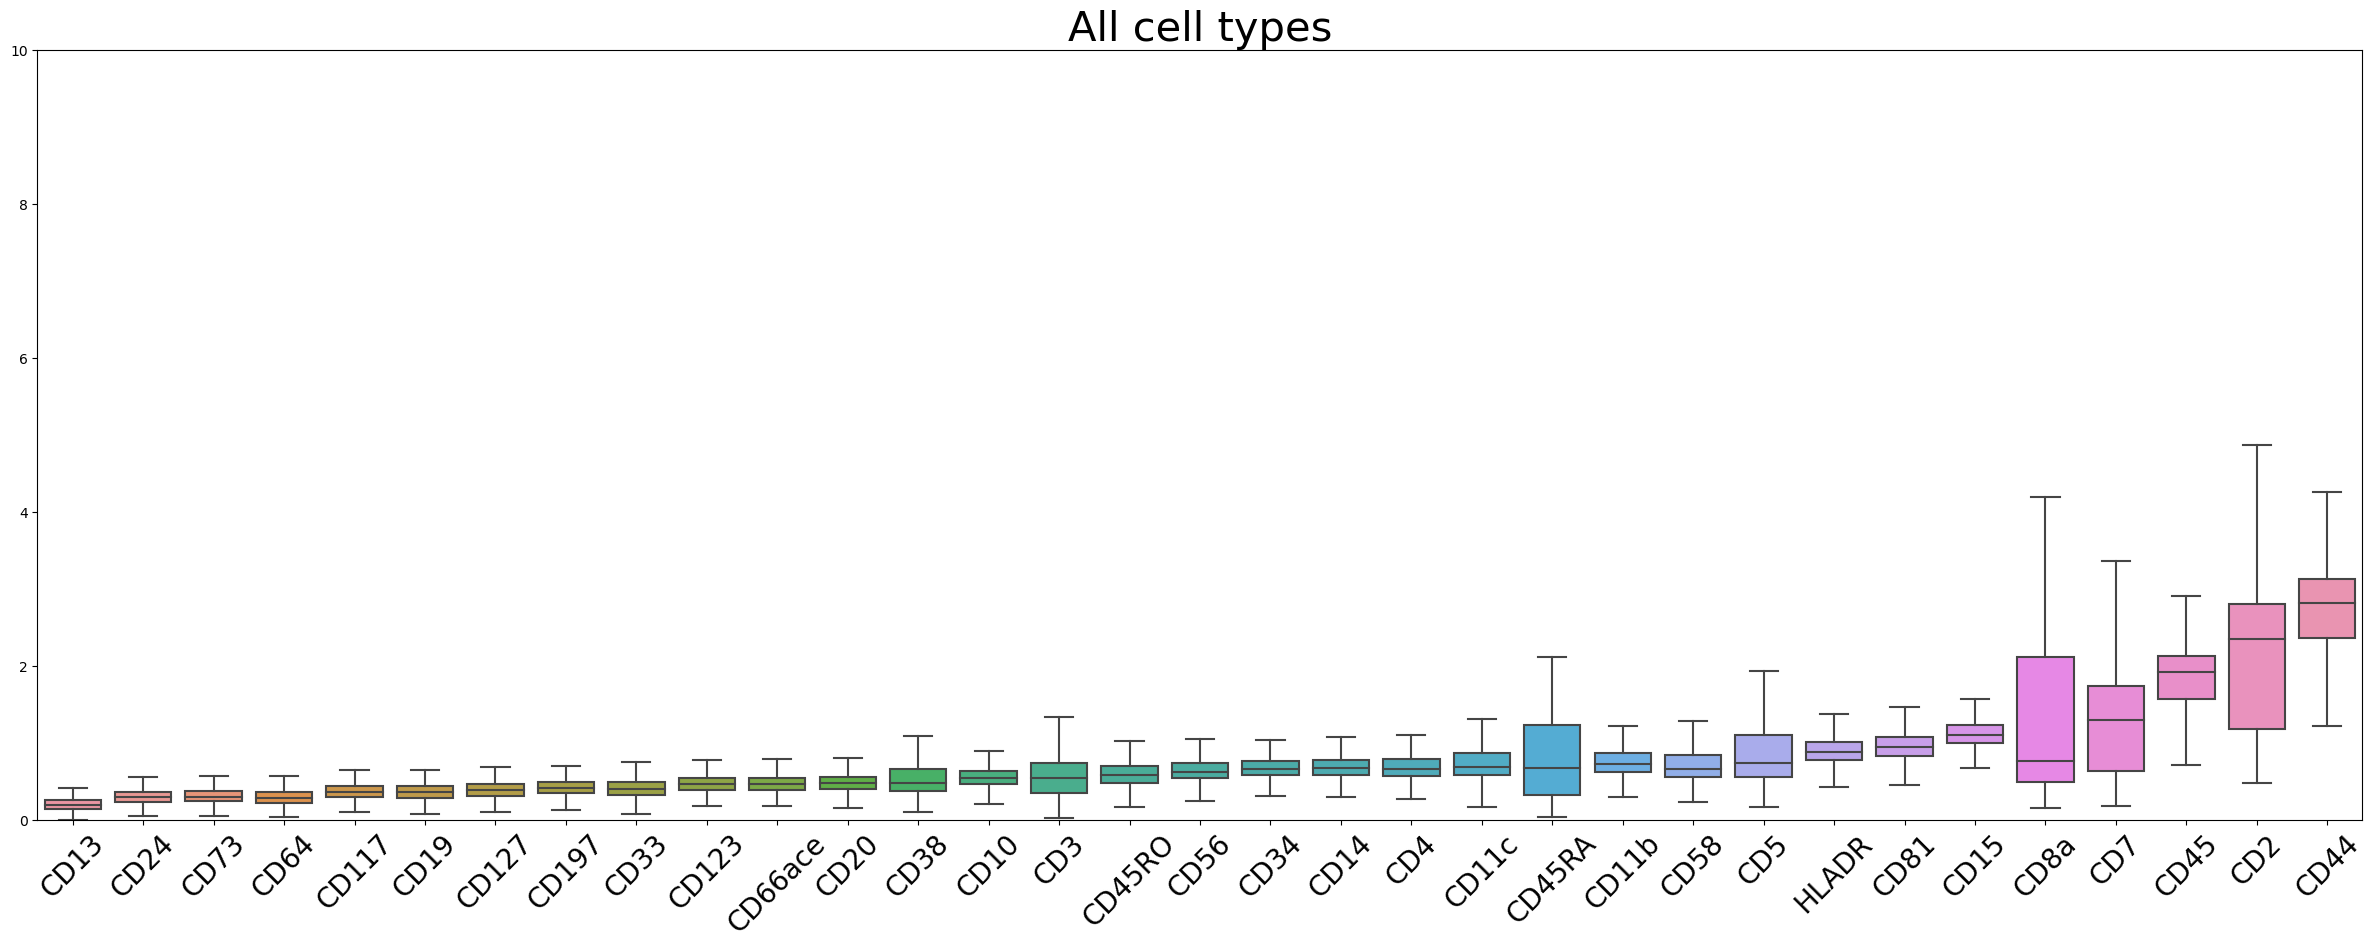

In [22]:
#All cell types

cells= len(prot)

print("In total:", cells, "cells in the sample" )

plt.figure(figsize=(30,10))
plt.ylim(0, 10)
a=sns.boxplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)




In total: 1585 NK- and T-cells in the sample


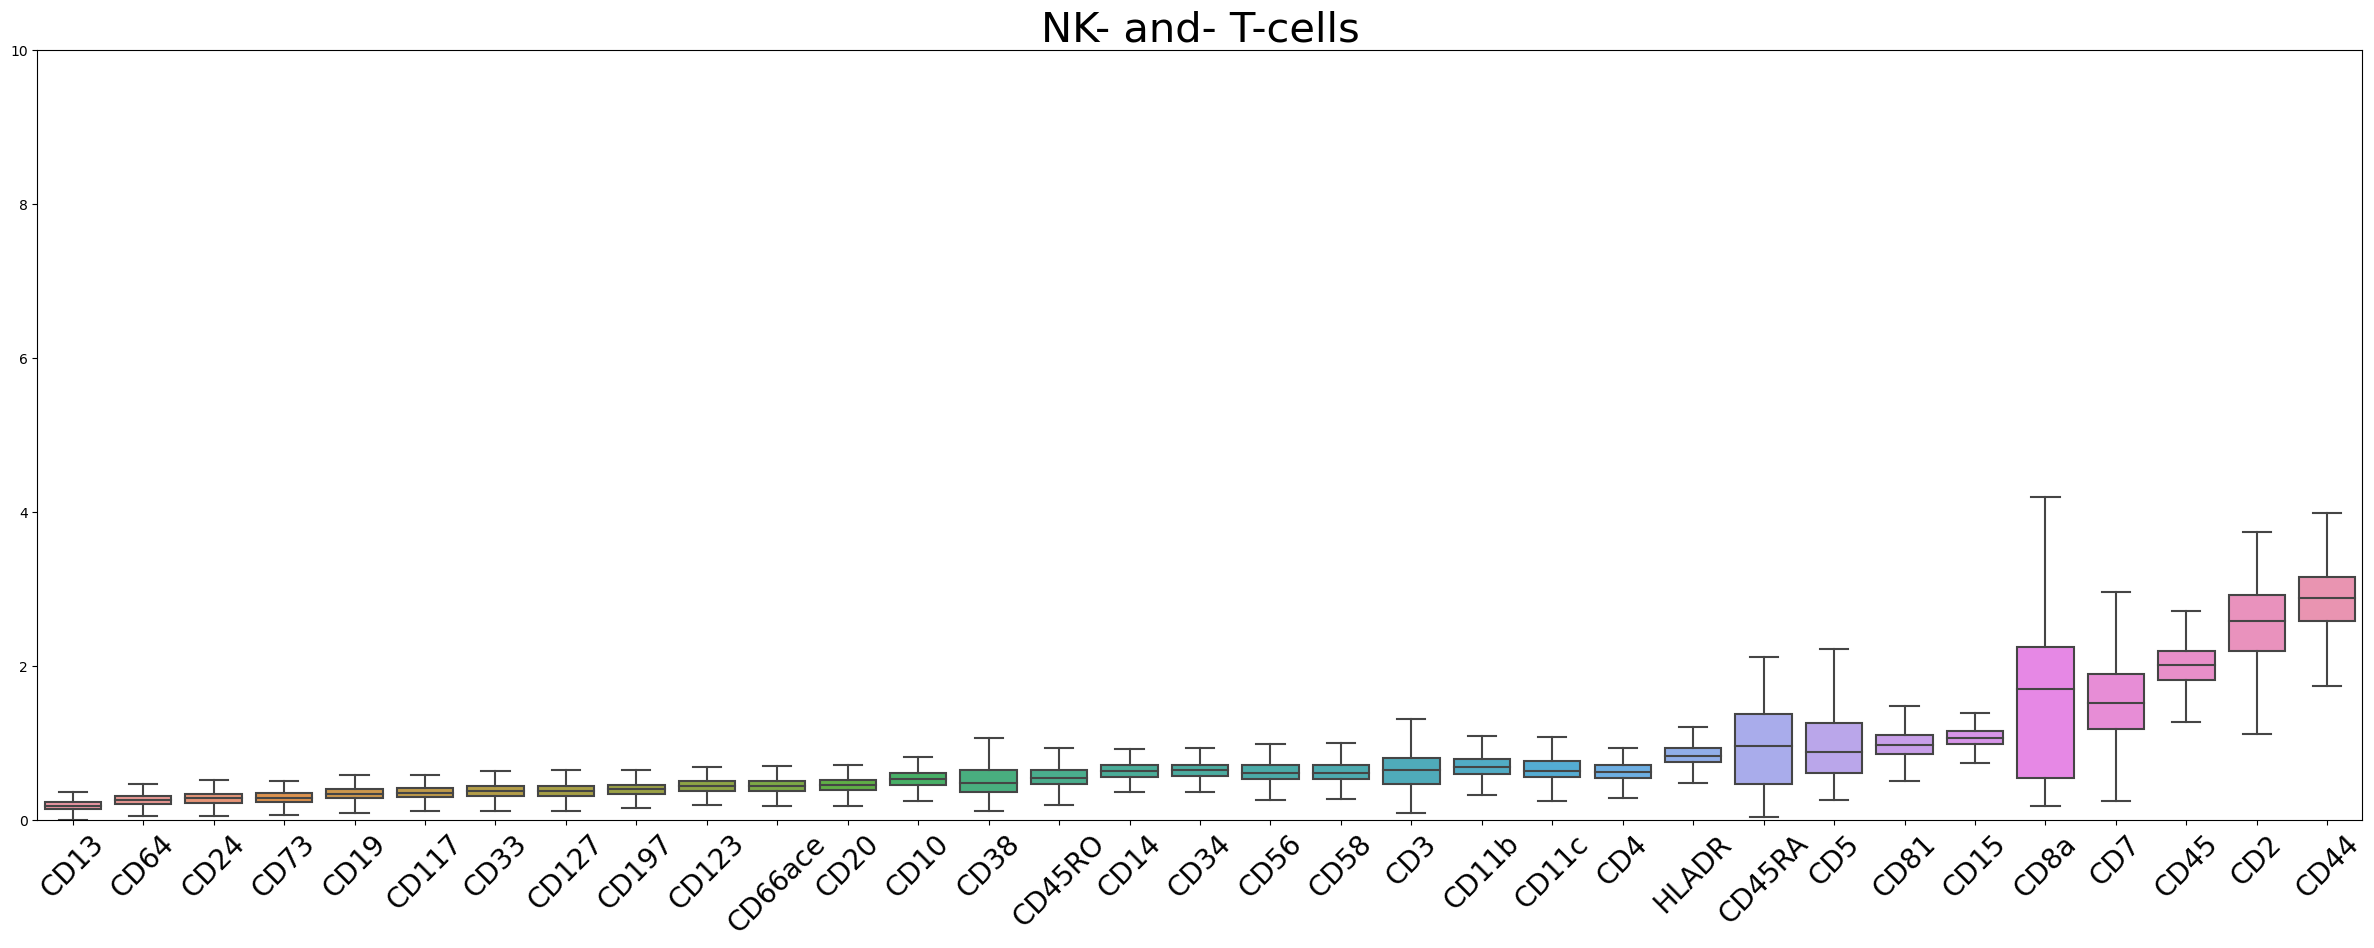

In [23]:
#NK- and T-cells

cells= len(nk_prot)

print("In total:", cells, "NK- and T-cells in the sample" )

plt.figure(figsize=(30,10))
plt.ylim(0, 10)
a=sns.boxplot(data=df_sorted_nk,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK- and- T-cells", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)


In total: 2169 cells in the sample


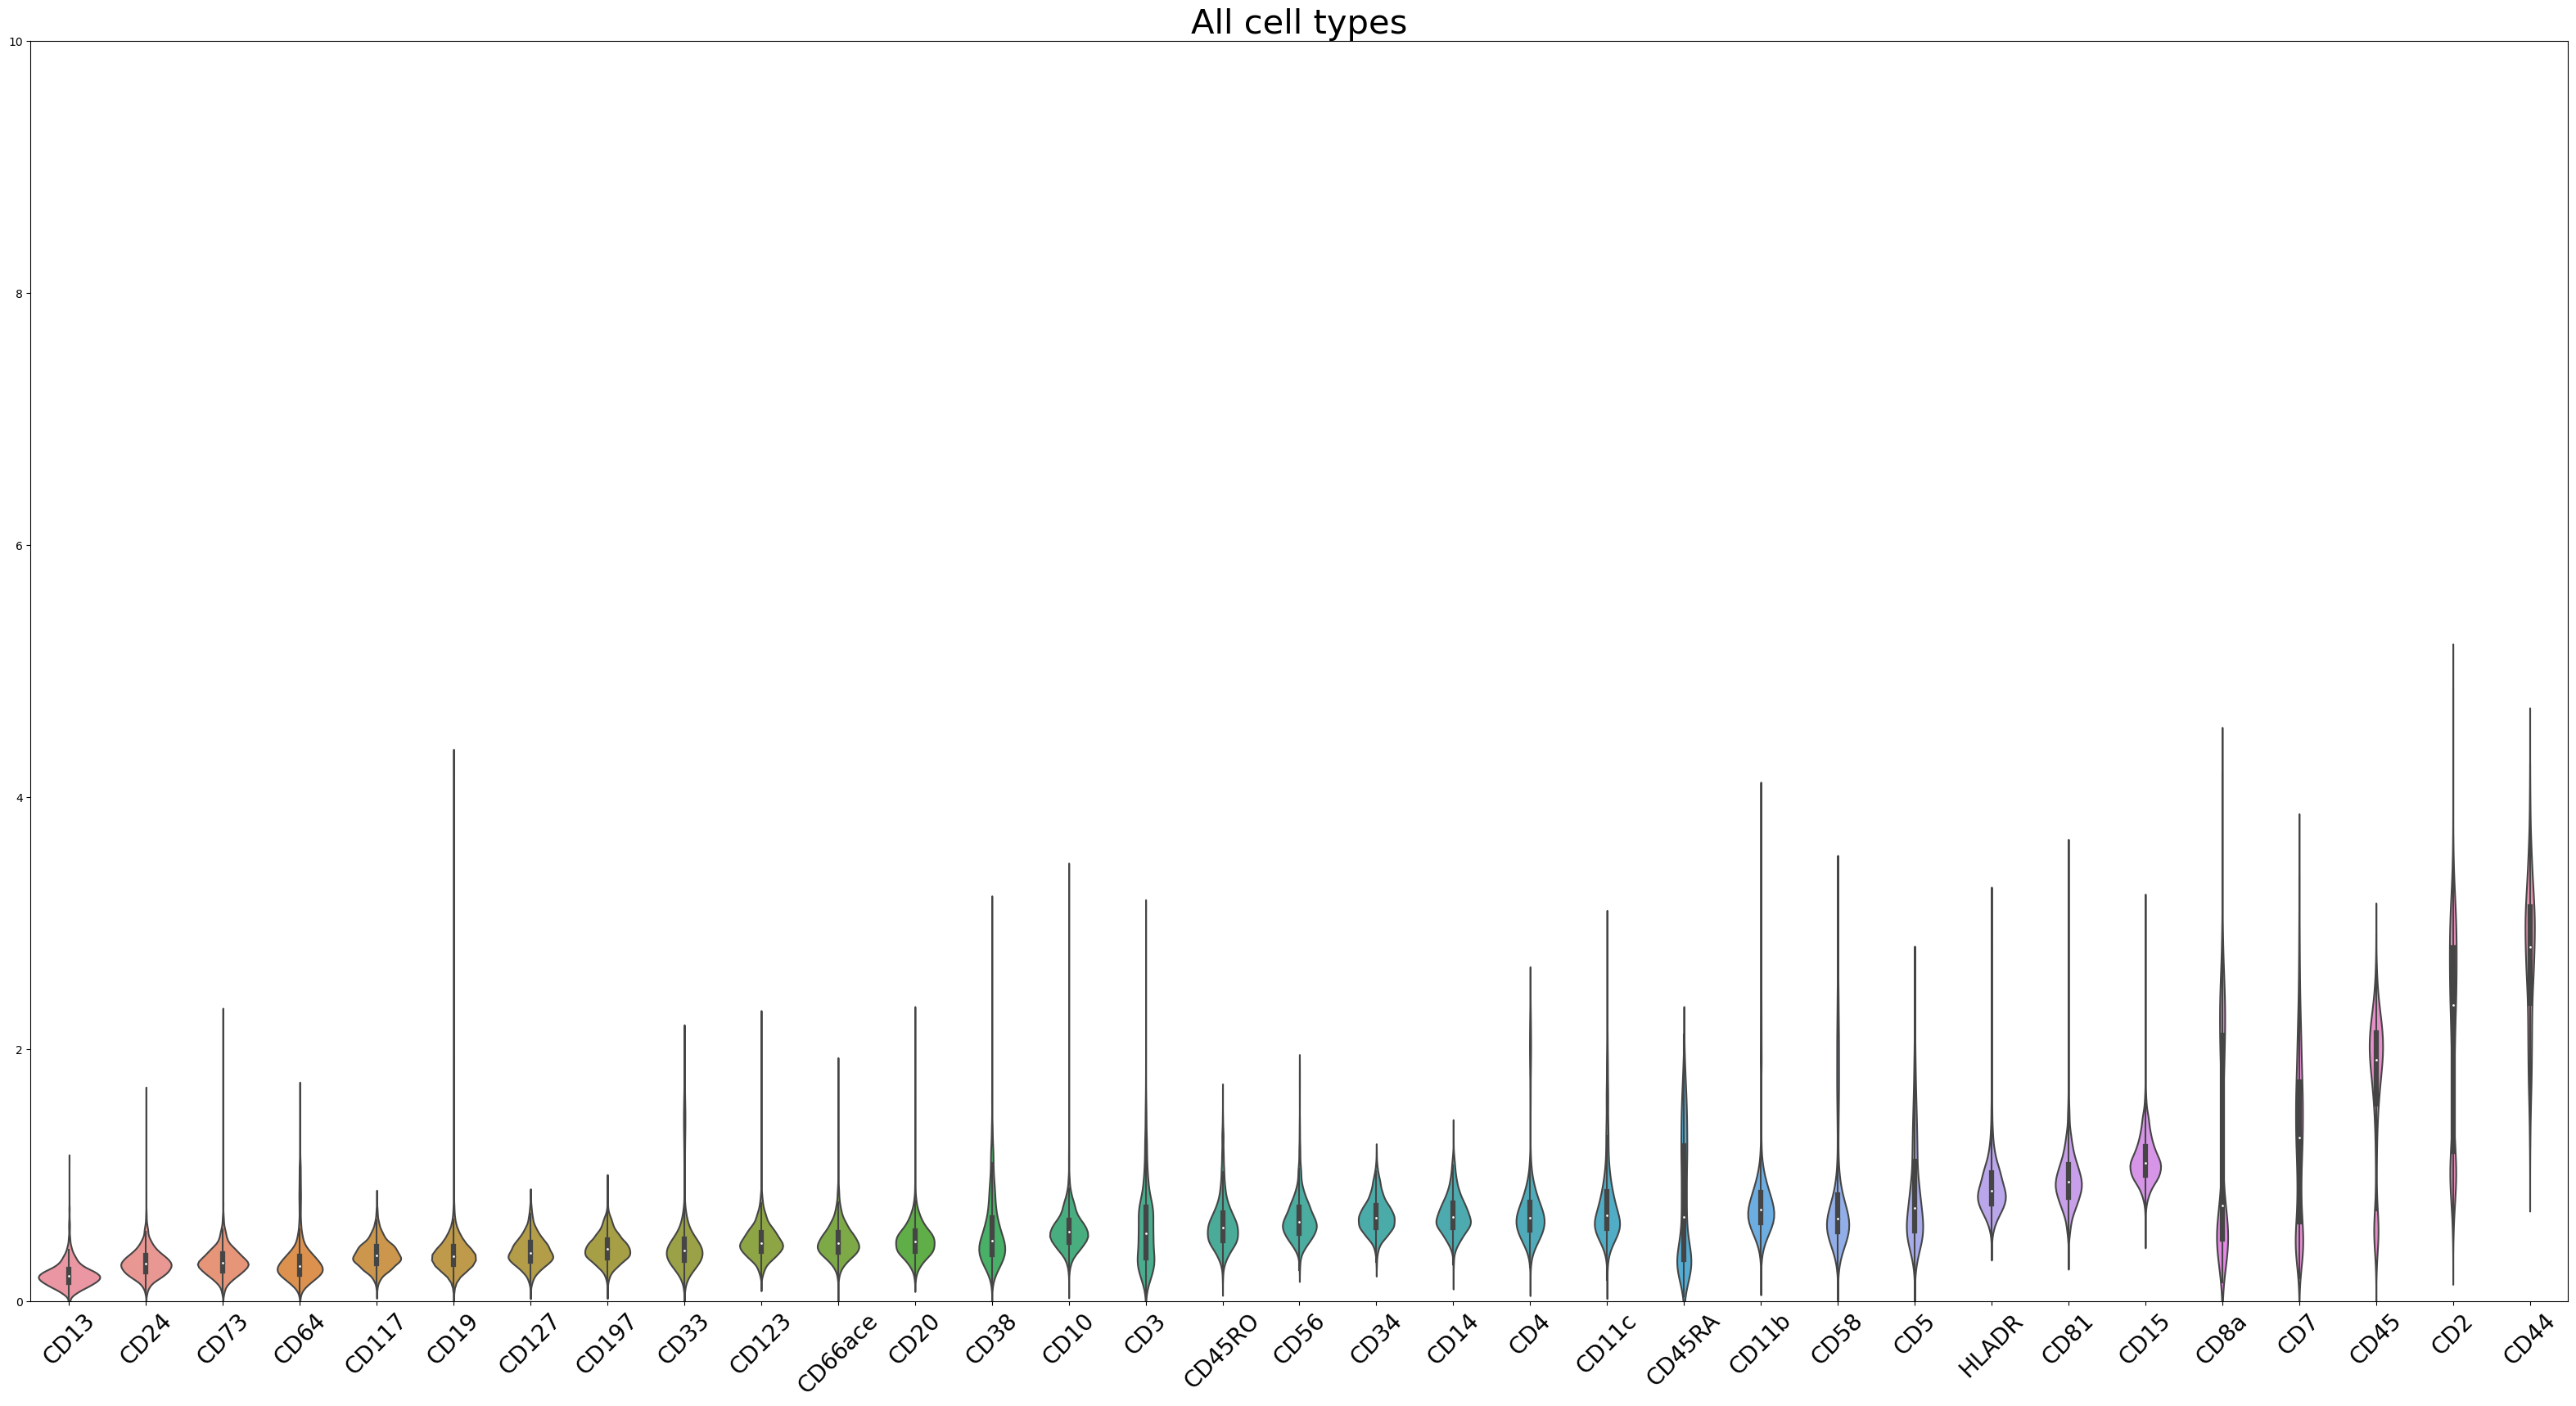

In [24]:
#All cells

cells= len(prot)

print("In total:", cells, "cells in the sample" )

plt.figure(figsize=(40,20))
plt.ylim(0, 10)
a=sns.violinplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("All cell types", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)

In total: 1585 NK- and T-cells in the sample


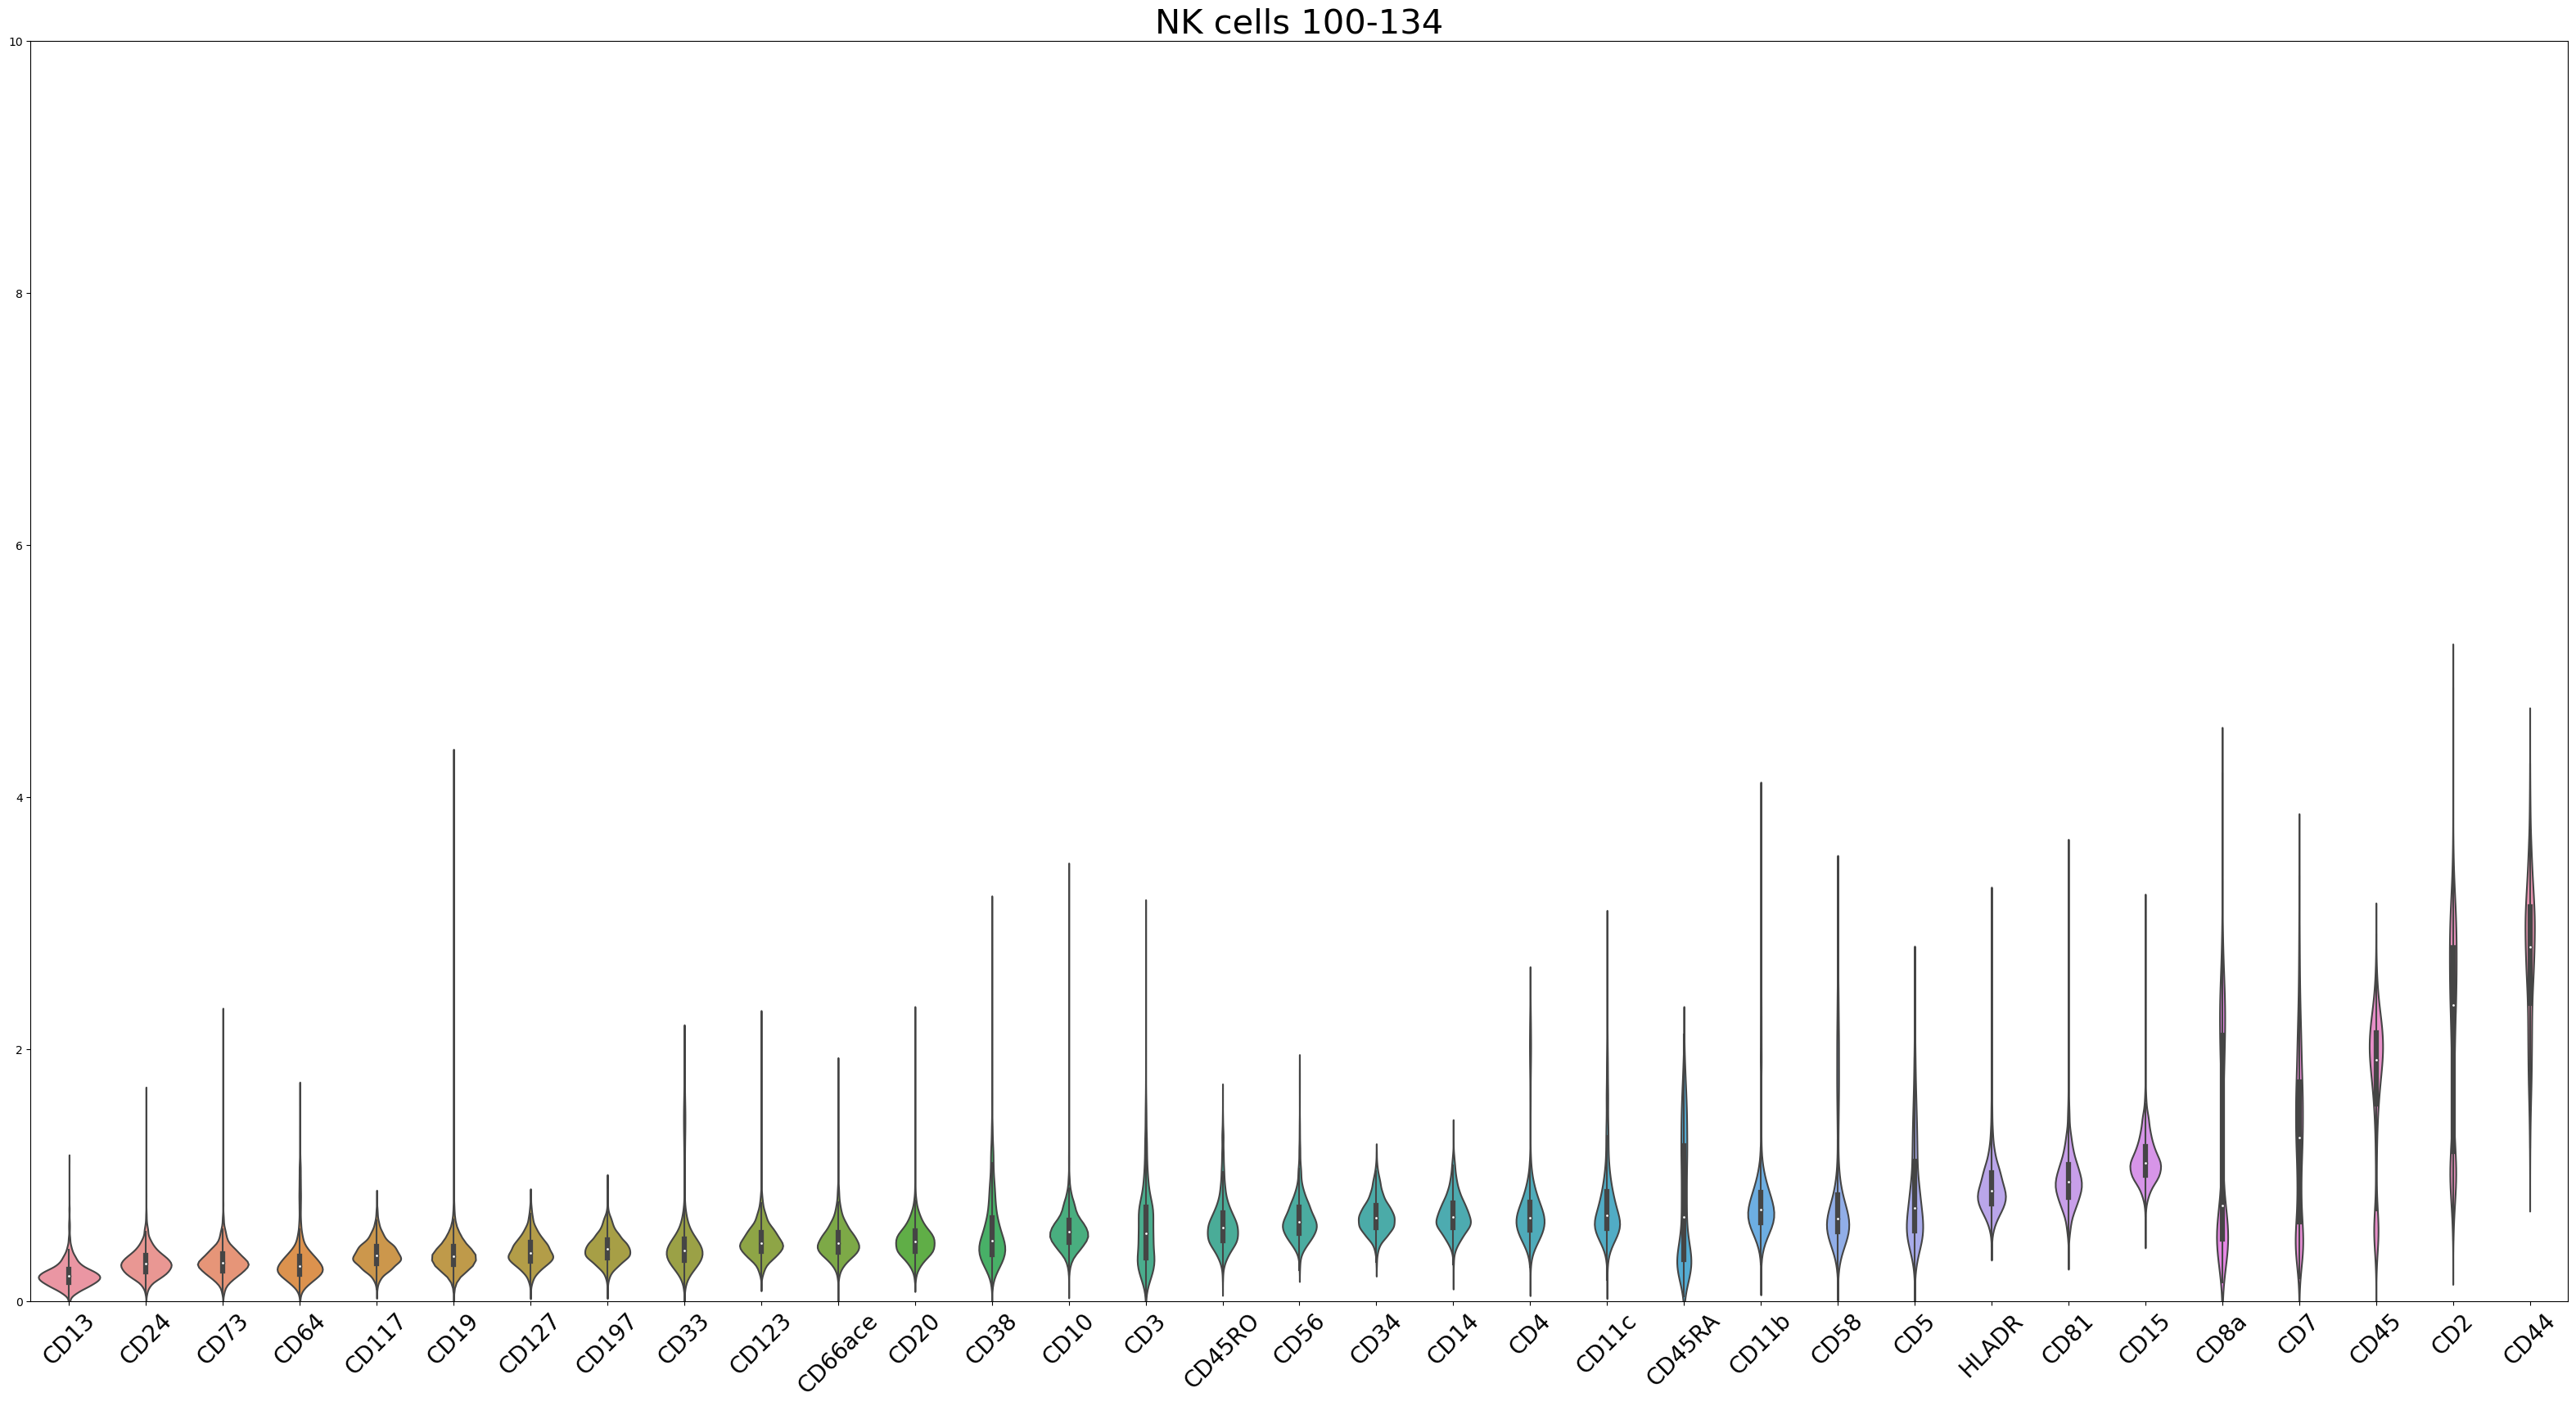

In [25]:
#NK cells

cells= len(nk_prot)

print("In total:", cells, "NK- and T-cells in the sample" )

plt.figure(figsize=(40,20))
plt.ylim(0, 10)
a=sns.violinplot(data=df_sorted_all,  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)
plt.title("NK cells 100-134", fontsize=30)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=20)



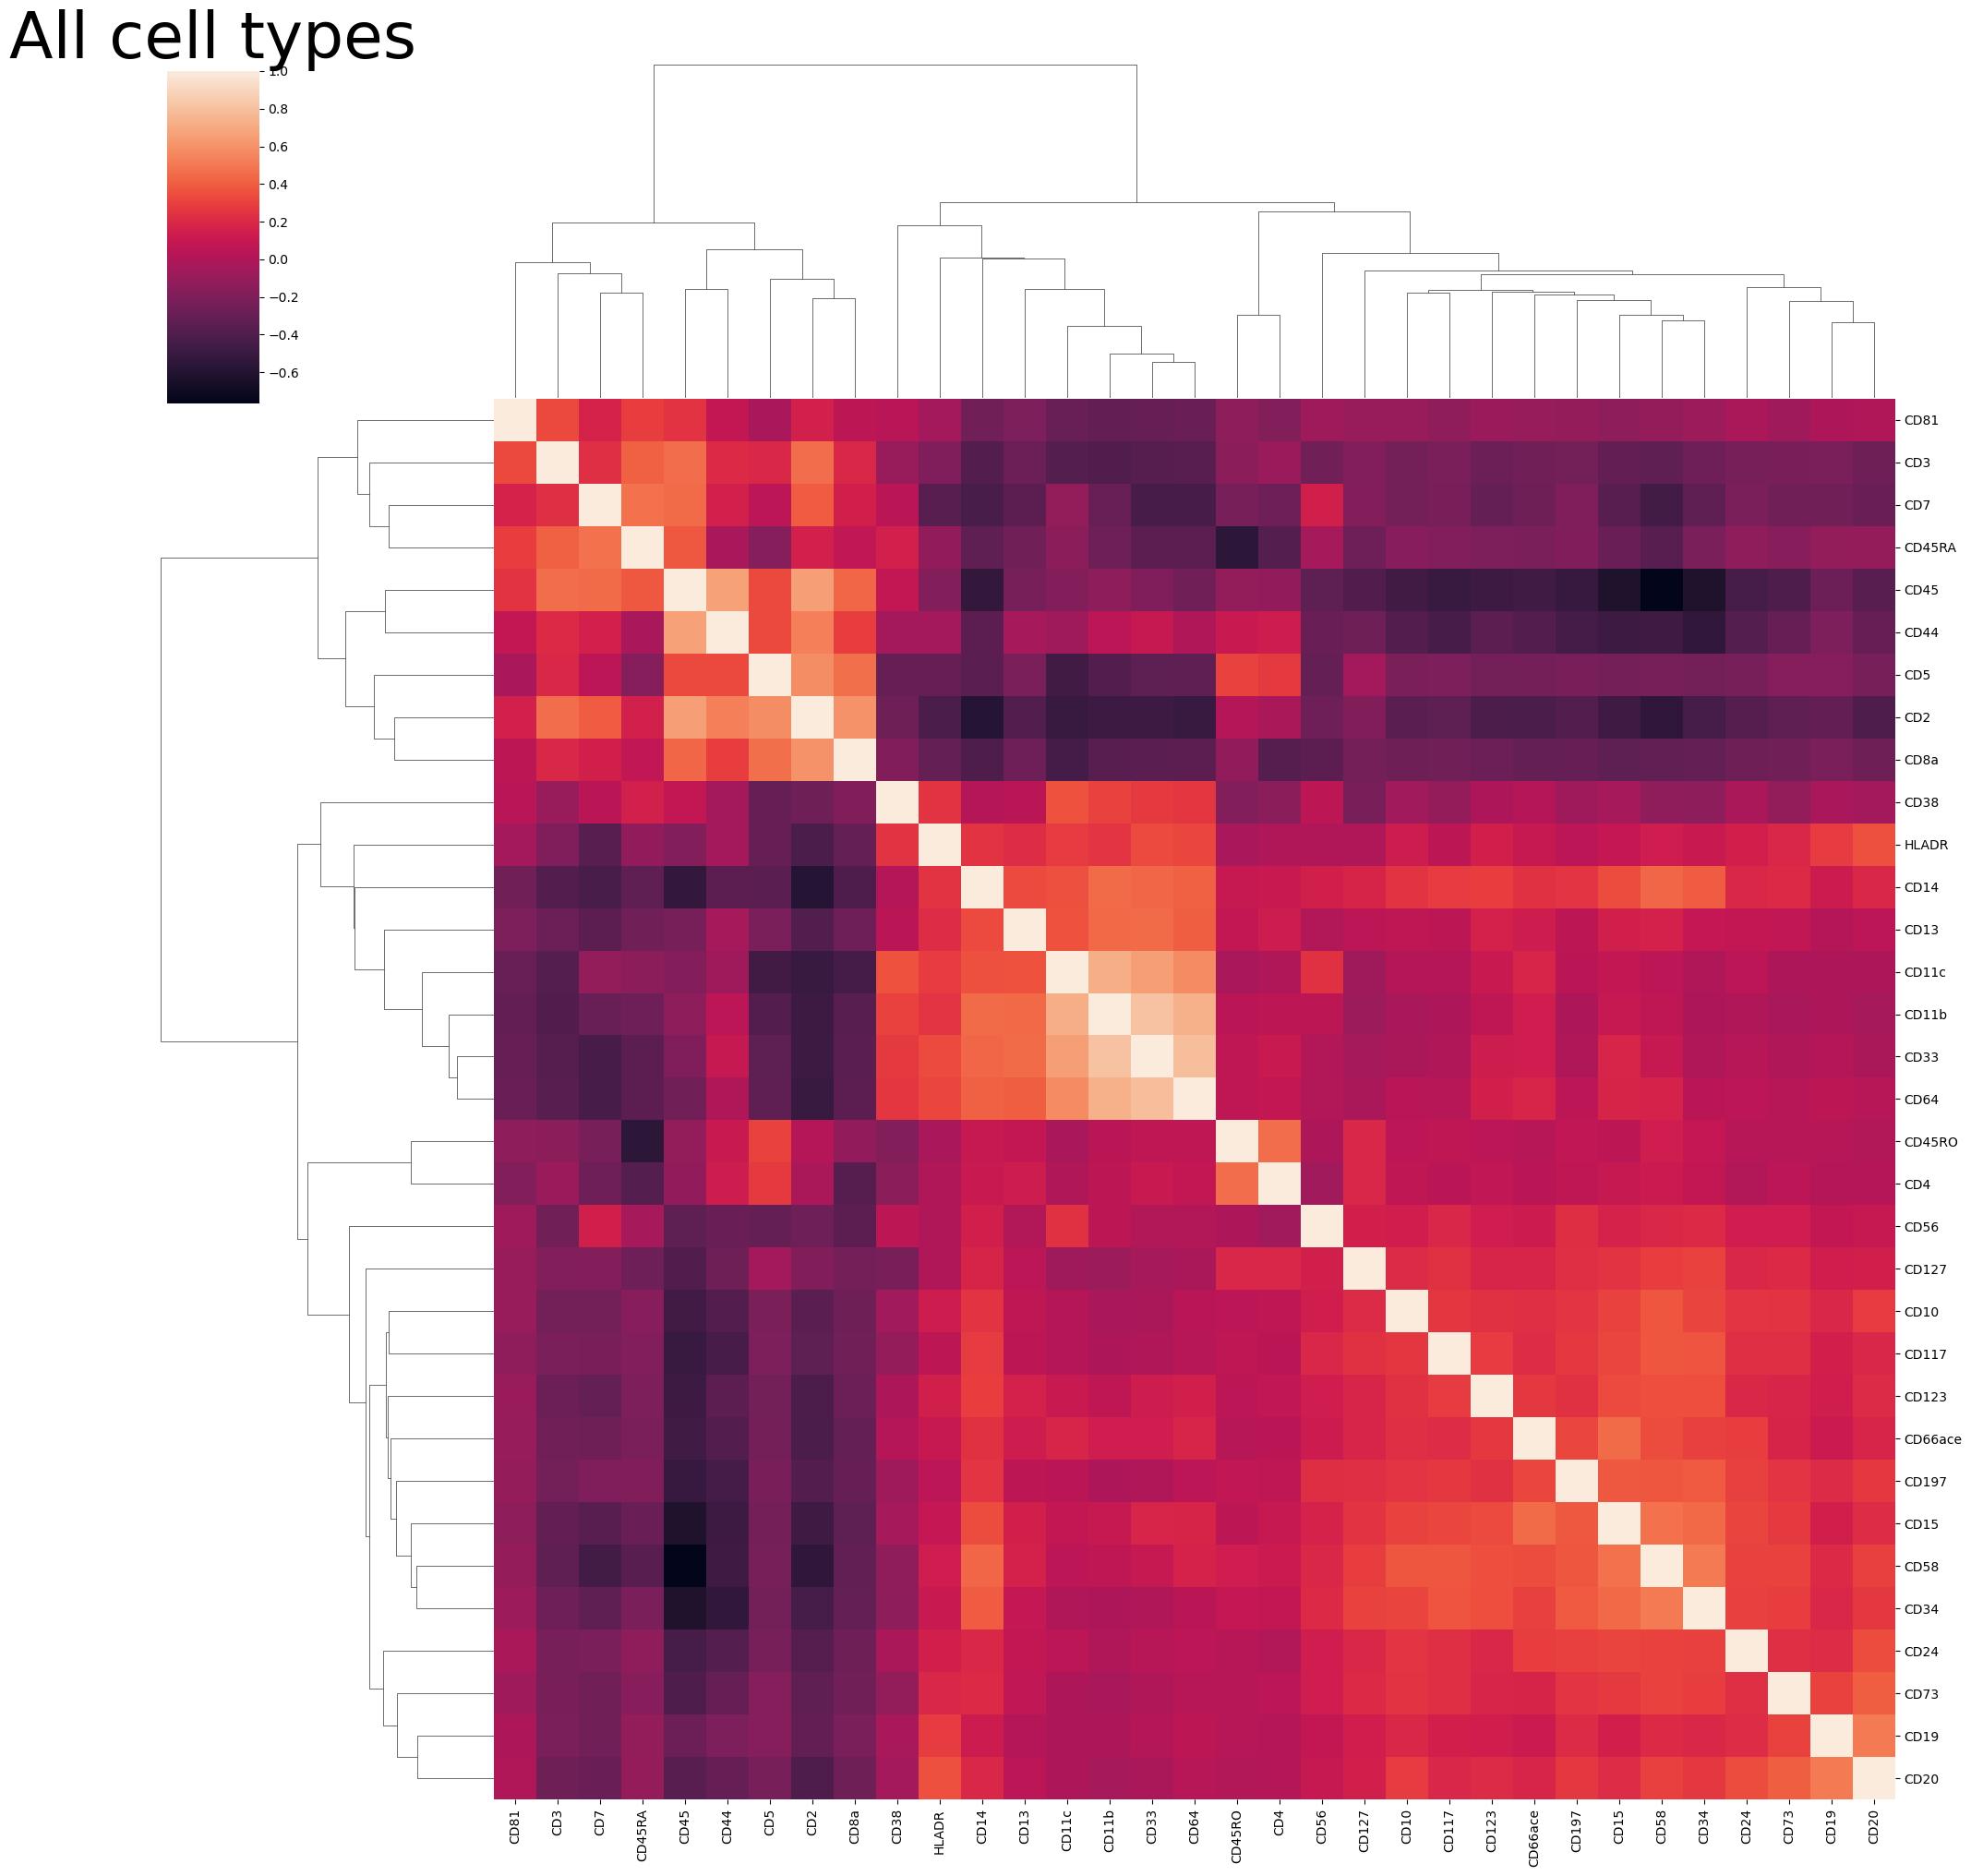

In [26]:
#All cells
matrix1=prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix1, figsize=(20,20))
plt.title('All cell types', fontsize = 50) ;



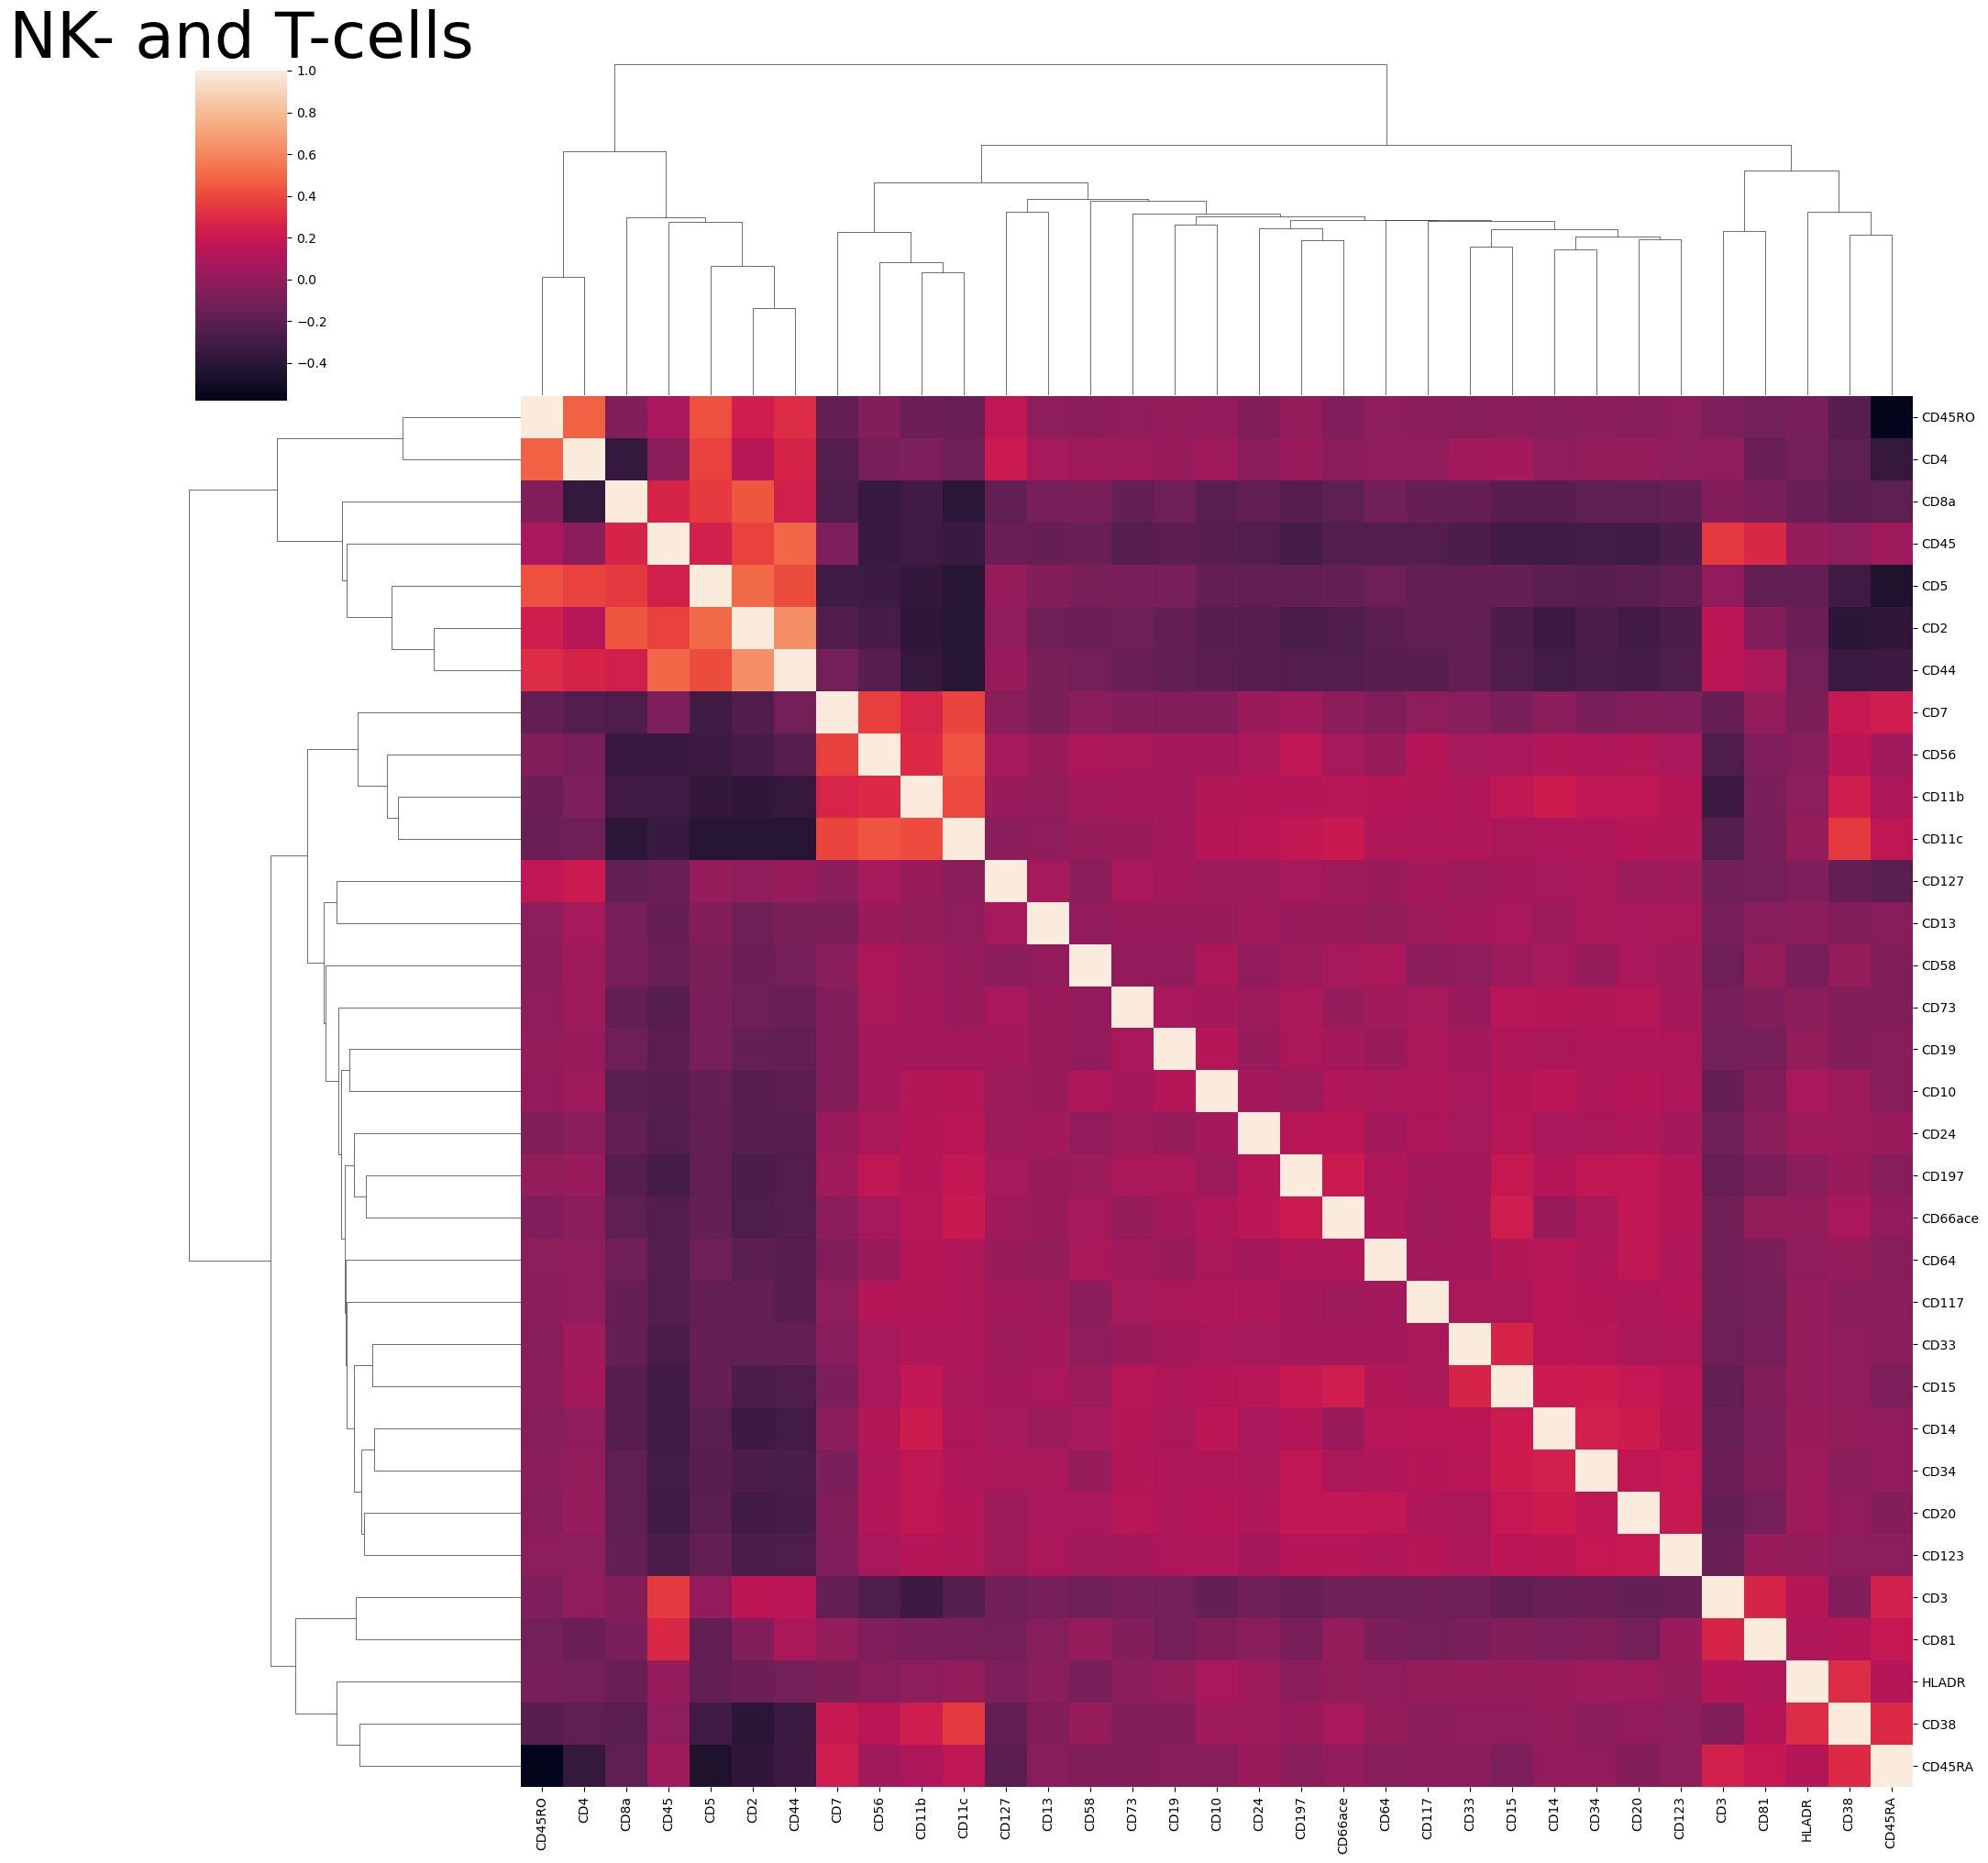

In [27]:
#NK cells
matrix3=nk_prot.corr(method='pearson', min_periods=1)
sns.clustermap(matrix3, figsize=(20,20))
plt.title('NK- and T-cells', fontsize = 50) ;


In [27]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_sample.obs
b = prot

neurips_umap=pd.concat([a, b], axis=1)

adata_sample.obs=neurips_umap
adata_sample

AnnData object with n_obs × n_vars = 2169 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [28]:
adata_sample.obs

,cell_type,n_genes,percent_mito,percent_ribo,n_counts,leiden_r2,leiden_r2_n_genes_MAD_diff,leiden_r2_n_counts_MAD_diff,leiden_r2_percent_mito_MAD_diff,filter,...,CD5,CD15,CD64,CD117,CD24,CD44,CD58,CD66ace,CD13,CD34
AAACCTGAGCTGAACG-1-107,NKT,2062,0.069411,0.210816,5806.0,NaN,NaN,NaN,NaN,False,...,0.480553,0.896037,0.169819,0.380302,0.220570,3.306257,0.499451,0.380302,0.195516,0.554093
AAACCTGAGGTGGGTT-1-107,NKT,1921,0.052361,0.302833,5825.0,NaN,NaN,NaN,NaN,False,...,0.692731,1.173545,0.242383,0.385396,0.385396,3.158288,0.567624,0.424595,0.162394,0.611089
AAACCTGGTATATCCG-1-107,NKT,2286,0.050748,0.241863,6483.0,NaN,NaN,NaN,NaN,False,...,1.700393,0.945820,0.306891,0.265385,0.079634,3.267820,0.541386,0.286353,0.129405,0.573038
AAACCTGGTCACACGC-1-107,NKT,1933,0.039291,0.201617,4454.0,NaN,NaN,NaN,NaN,False,...,0.760805,1.263397,0.285906,0.365539,0.285906,2.242971,0.507983,0.257888,0.199379,0.592792
AAACCTGGTCCAGTGC-1-107,NKT,1794,0.045793,0.234604,4433.0,NaN,NaN,NaN,NaN,False,...,0.447443,1.105133,0.282698,0.326498,0.347698,2.982694,0.484712,0.466251,0.260057,0.572227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACACTGCG-1-107,non-leukemic,273,0.053977,0.389205,704.0,NaN,NaN,NaN,NaN,False,...,0.668149,1.467881,0.397539,0.614024,0.431486,1.010543,0.641453,0.627833,0.208016,0.972414
TTTGTCAGTCGCGTGT-1-107,non-leukemic,2477,0.091733,0.106267,10596.0,NaN,NaN,NaN,NaN,False,...,0.652345,1.185717,0.195961,0.396814,0.396814,2.142728,2.394075,0.594320,0.396814,0.707187
TTTGTCATCAGTACGT-1-107,NKT,1938,0.057875,0.141129,4216.0,NaN,NaN,NaN,NaN,False,...,0.636669,1.022577,0.309441,0.379513,0.063856,2.477620,0.564346,0.601161,0.123878,0.582923
TTTGTCATCGCCTGAG-1-107,NKT,1230,0.101195,0.200632,2846.0,NaN,NaN,NaN,NaN,False,...,0.728007,0.989903,0.248288,0.291321,0.291321,3.498691,0.989903,0.482441,0.203319,0.728007


In [29]:
#Adding protein data to anndata file for UMAPs, all cell types

a = adata_nk.obs
b = nk_prot

adata_nk_umap=pd.concat([a, b], axis=1)

adata_nk.obs=adata_nk_umap

adata_nk

AnnData object with n_obs × n_vars = 1585 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [30]:
adata_nk.obs["CD56"]

AAACCTGAGCTGAACG-1-107    1.429685
AAACCTGAGGTGGGTT-1-107    0.846823
AAACCTGGTATATCCG-1-107    0.525176
AAACCTGGTCACACGC-1-107    0.632643
AAACCTGGTCCAGTGC-1-107    0.538135
                            ...   
TTTGGTTTCACGCGGT-1-107    1.204039
TTTGGTTTCTGTCAAG-1-107    0.368886
TTTGTCAAGTCGTTTG-1-107    1.054022
TTTGTCATCAGTACGT-1-107    0.653961
TTTGTCATCGCCTGAG-1-107    0.581724
Name: CD56, Length: 1585, dtype: float64

In [31]:
#NK-cell markers

markers=["CD56"]

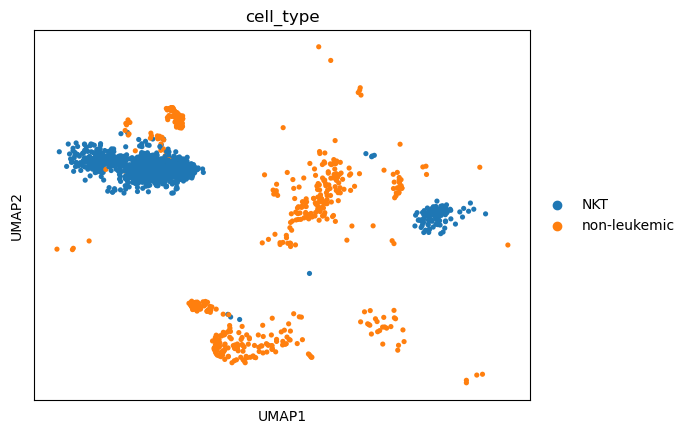

In [32]:
#All cell types
sc.pl.umap(adata_sample, color= "cell_type", vmax="p99", color_map= 'viridis')

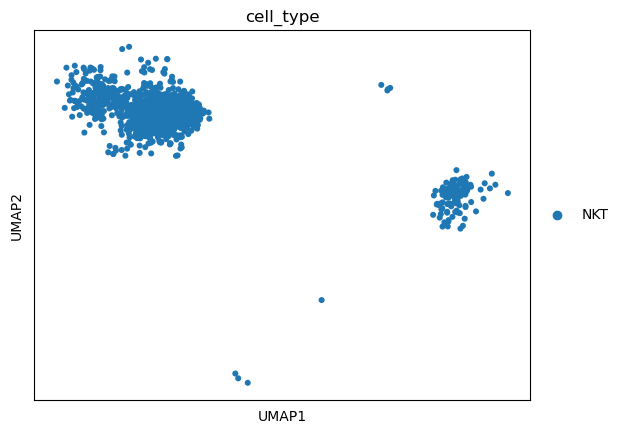

In [33]:
#NK- and T-cells

sc.pl.umap(adata_nk, color = "cell_type",vmax="p99", color_map = 'viridis')

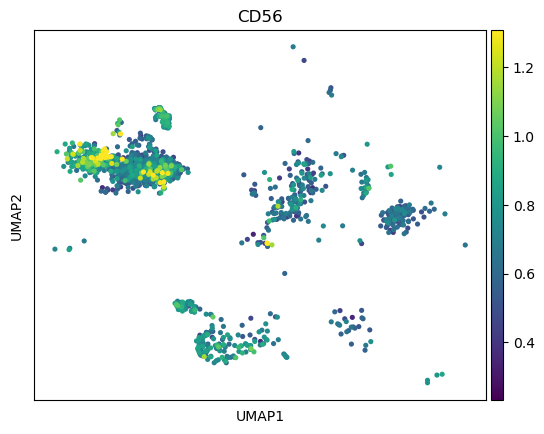

In [47]:
#All cell types

sc.pl.umap(adata_sample, color= markers, vmax="p99", color_map= 'viridis')

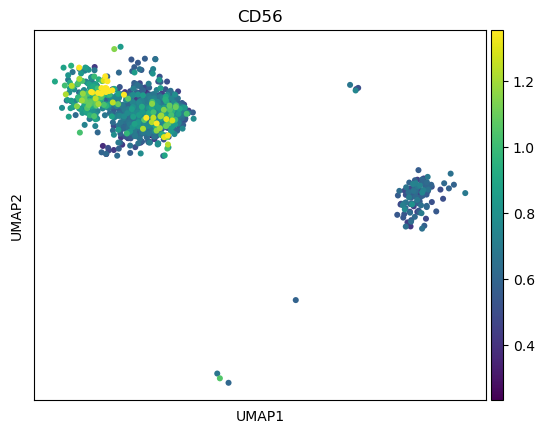

In [48]:
#NK and T-cells

sc.pl.umap(adata_nk, color = markers, vmax="p99", color_map = 'viridis')

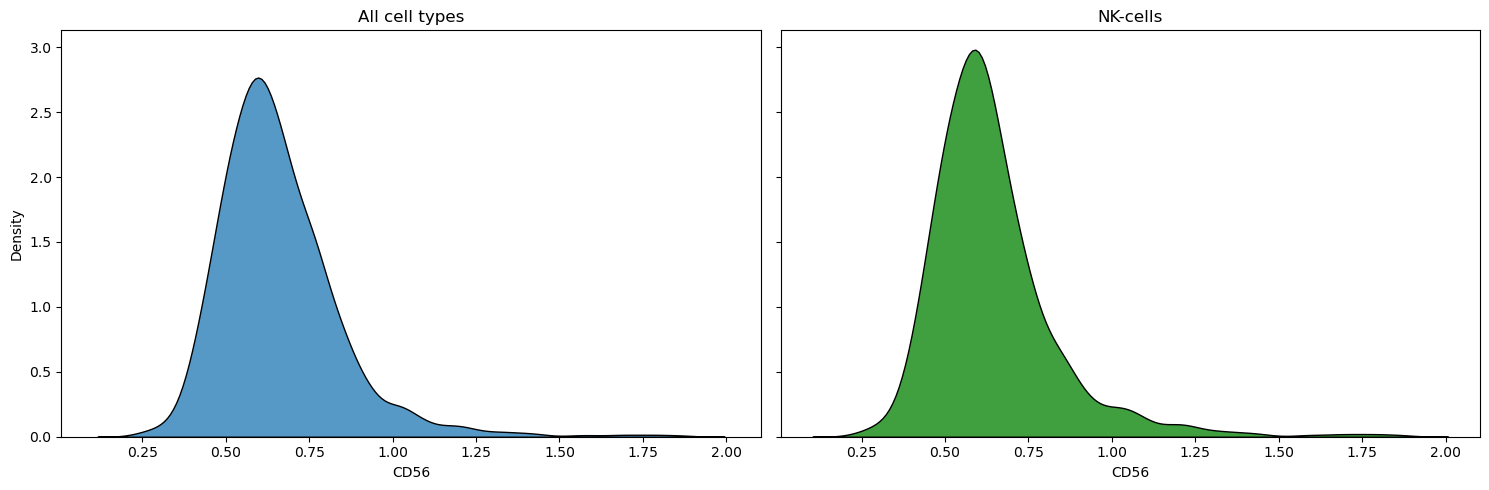

In [44]:
#NK and T-cells

for column_name in markers:
    fig, ax =plt.subplots(1,2 ,tight_layout=True, figsize=(15, 5), sharex=True, sharey=True)
    fig.show()

    ax1 = sns.kdeplot(data=prot, x=column_name, multiple="stack", ax=ax[0]) ;
    ax2 = sns.kdeplot(data=nk_prot, x=column_name, color = "g", multiple="stack", ax=ax[1]) ;


    ax1.title.set_text('All cell types')    
    ax2.title.set_text('NK-cells')
    
    plt.show()

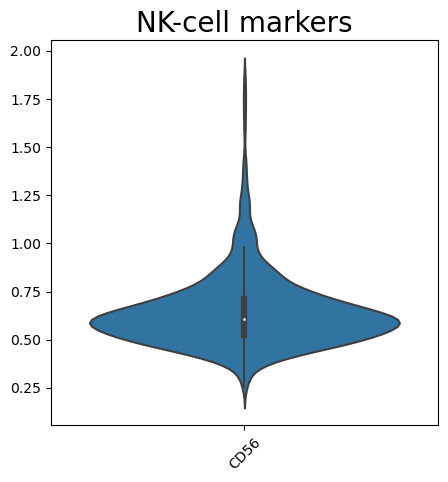

In [43]:
#NK markers

plt.figure(figsize=(5,5))
a=sns.violinplot(data=nk_prot[markers],  fliersize=0)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=10)
plt.title("NK-cell markers", fontsize=20)

a.set_xticklabels(a.get_xticklabels(),rotation=45) 
a.tick_params(axis='x', labelsize=10)